In [1]:
%matplotlib notebook
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
mt = sio.loadmat('data/natimg2800_M170714_MP032_2017-09-14.mat')

### stimulus responses
resp = mt['stim'][0]['resp'][0]    # stimuli by neurons
istim = mt['stim'][0]['istim'][0]   # identities of stimuli in resp
spont = mt['stim'][0]['spont'][0]  # timepoints by neurons

### cell information
med = mt['med']                 # cell centers (X Y Z)

### loading images
mt2 = sio.loadmat('data/images_natimg2800_all.mat')
imgs = mt2['imgs']  # 68 by 270 by number of images
# check out first image using matplotlib.pyplot
# plt.imshow(imgs[:,:,0])
# plt.show()

In [2]:
sp = resp[np.where(istim==2801)[0]]

In [3]:
sp.shape

(335, 9476)

In [4]:
spont.shape           ## How can we use this??? -a: it is the same as the gray image values

(335, 9476)

In [5]:
np.array_equal(sp,spont)

True

In [6]:
eps = 1e-9
no_gray = resp[np.where(istim != 2801)[0], :]
no_gray_std = (no_gray-np.mean(no_gray, axis = 0))/(np.std(no_gray, axis = 0)+eps)
imgids = istim[np.where(istim != 2801)[0]]
# imgs.shape
# imgs[:,:,imgids-1].shape
# no_gray_std[:,0:1].shape
# (imgs[:,:,imgids-1]*no_gray_std[:,0:1]).squeeze().shape

In [25]:
gray_avg_resp = np.mean(resp[np.where(istim==2801)[0],:], axis = 0)

In [29]:
# Subtract gray responses avg
gray_avg_resp = np.mean(resp[np.where(istim==2801)[0],:], axis = 0)
no_gray_norm = no_gray - gray_avg_resp[None,:]

Here I am just plotting the avg imgs of some neurons

<IPython.core.display.Javascript object>


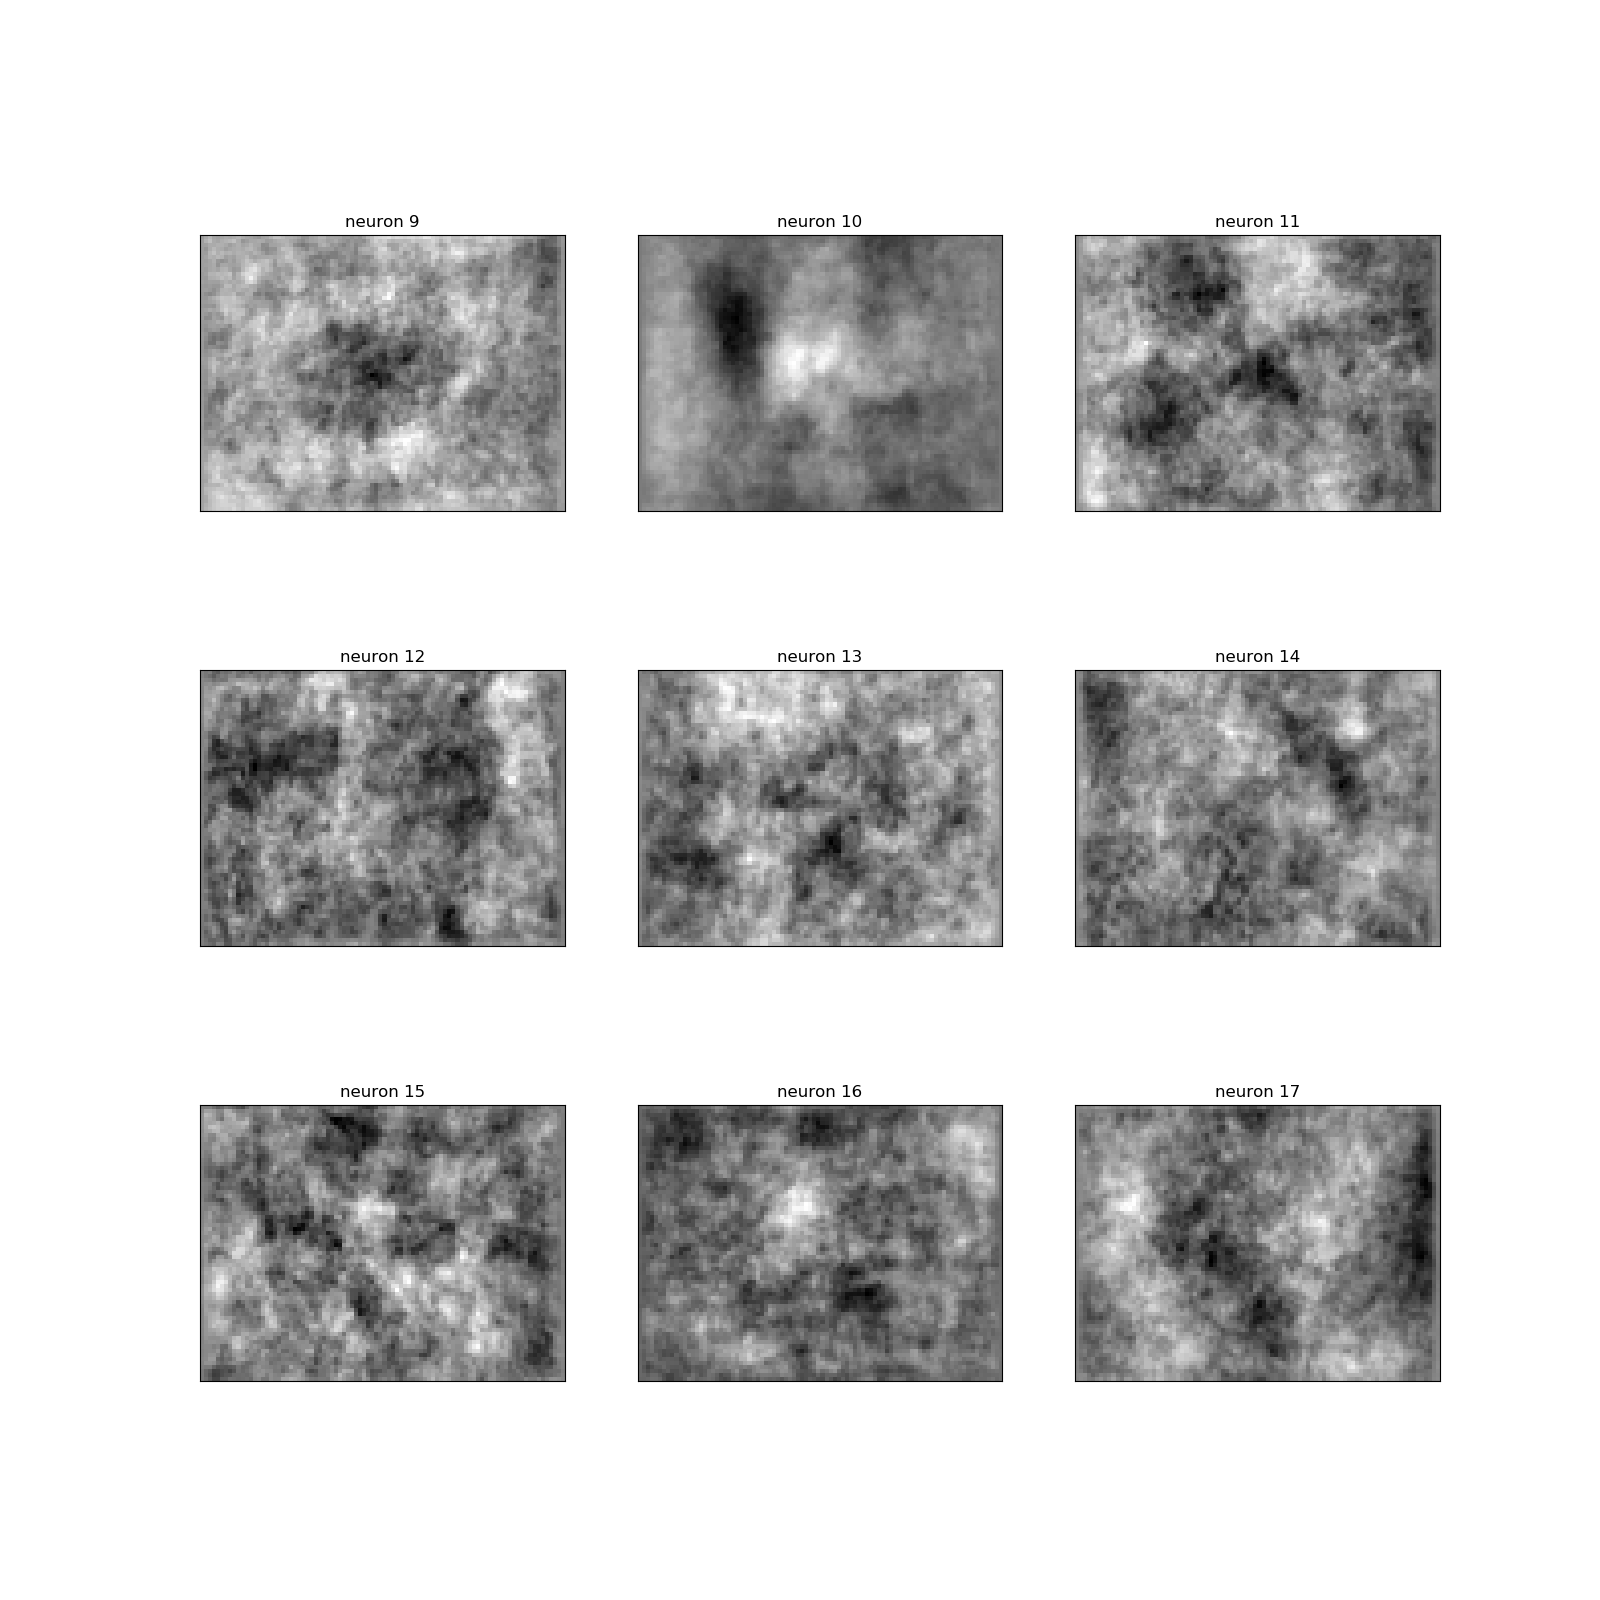

In [8]:
plt.figure(figsize=(16,16))
for i, neuron_id in enumerate(range(9,18)):
    avg_img = np.mean((imgs[:,:,imgids-1]*no_gray_std[:,neuron_id][:,None]).squeeze(), axis=-1)
#     avg_img = all_avg_imgs[neuron_id]
    plt.subplot(3,3,1+i, xticks=[], yticks=[])
    plt.imshow(avg_img[:,90:180], cmap='gray')
    plt.title(f'neuron {neuron_id}')
plt.show()

In [9]:
from sklearn.metrics.pairwise import euclidean_distances

Here I am getting the neurons where their avg image is similar and plotting their 3D location to see the spatial effect on the tune curve

In [30]:
all_avg_imgs_no_gray = np.array([np.mean((imgs[:,:,imgids-1]*no_gray_norm[:,neuron_id][:,None]).squeeze(), axis=-1) for neuron_id in range(resp.shape[1])])

In [ ]:
all_avg_imgs = np.array([np.mean((imgs[:,:,imgids-1]*no_gray_std[:,neuron_id][:,None]).squeeze(), axis=-1) for neuron_id in range(resp.shape[1])])

In [10]:
import pickle
with open('all_avg_imgs.pkl', 'rb') as f:
    all_avg_imgs = pickle.load(f)

In [ ]:
import pickle
with open('all_avg_imgs.pkl', 'wb') as f:
    pickle.dump(all_avg_imgs, f)

In [31]:
with open('all_avg_imgs_no_gray.pkl', 'wb') as f:
    pickle.dump(all_avg_imgs_no_gray, f)

In [12]:
avg_imgs_dists = euclidean_distances(all_avg_imgs.reshape([all_avg_imgs.shape[0],-1]))

In [39]:
similar_tune_neurons = np.argsort(avg_imgs_dists[0])[:300]

<IPython.core.display.Javascript object>


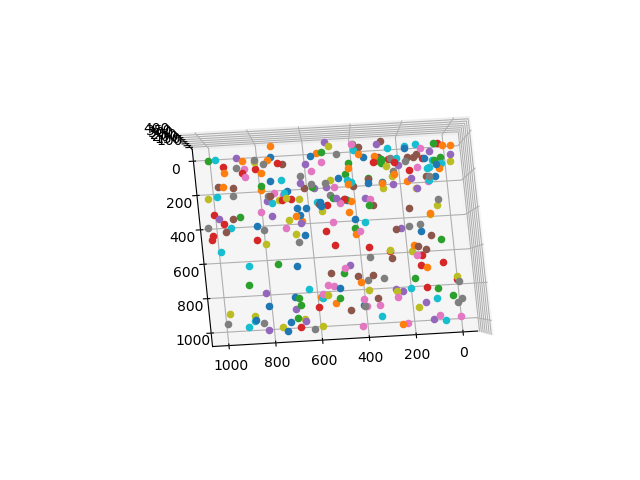

In [40]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for m in med[similar_tune_neurons]:
    ax.scatter(m[0], m[1], m[2])
plt.show()

I am now trying with avg images after subtracting gray image

In [32]:
avg_imgs_dists_no_gray = euclidean_distances(all_avg_imgs_no_gray.reshape([all_avg_imgs_no_gray.shape[0],-1]))

In [37]:
similar_tune_neurons_no_gray = np.argsort(avg_imgs_dists_no_gray[0])[:300]

<IPython.core.display.Javascript object>


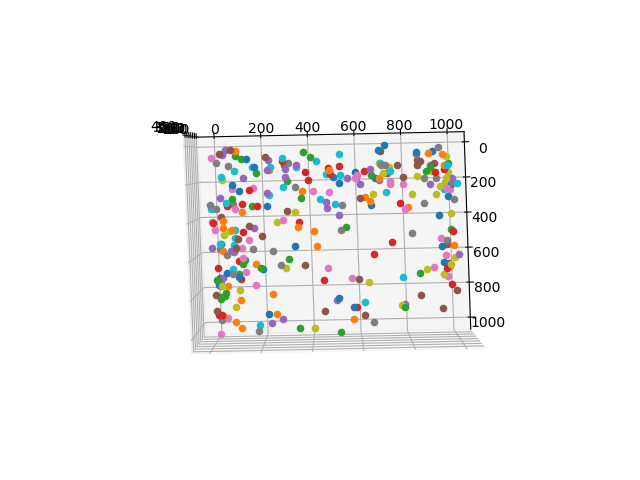

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for m in med[similar_tune_neurons_no_gray]:
    ax.scatter(m[0], m[1], m[2])
plt.show()

Here I am trying to see whether the 3D location have an effect on the avg img. $$$$
I do so by getting the pairwise distance between 3D data and choose the 10 closest neurons to a certain neuron and plot their imgs

In [19]:
dists = euclidean_distances(med)

In [20]:
neuro_id = 1
close_neurons = np.argsort(dists[neuro_id])[:9]

<IPython.core.display.Javascript object>


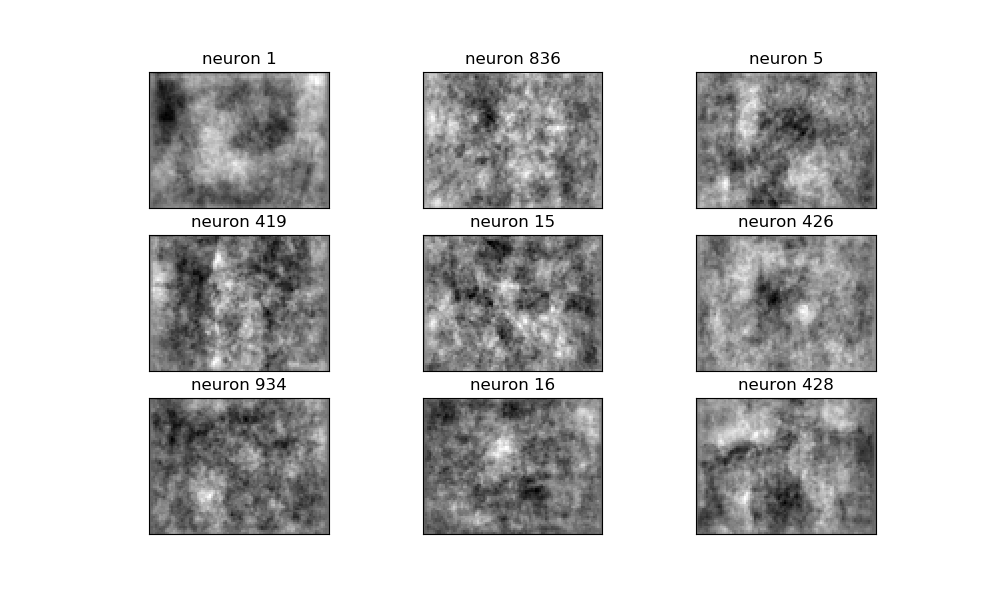

In [23]:
plt.figure(figsize=(10,6))
for i, neuron_id in enumerate(close_neurons):
    avg_img = all_avg_imgs[neuron_id]
    plt.subplot(3,3,1+i, xticks=[], yticks=[])
    plt.imshow(avg_img[:,90:180], cmap='gray')
#     plt.imshow(avg_img)
    plt.title(f'neuron {neuron_id}')
plt.show()

In [ ]:
# plt.figure(figsize=(16,6))
# for i, neuron_id in enumerate(close_neurons):
#     avg_img = np.mean((imgs[:,:,imgids-1]*no_gray_std[:,neuron_id][:,None]).squeeze(), axis=-1)
#     plt.subplot(3,3,1+i, xticks=[], yticks=[])
#     plt.imshow(avg_img[:,90:180], cmap='gray')
# #     plt.imshow(avg_img)
#     plt.title(f'neuron {neuron_id}')
# plt.show()

<IPython.core.display.Javascript object>


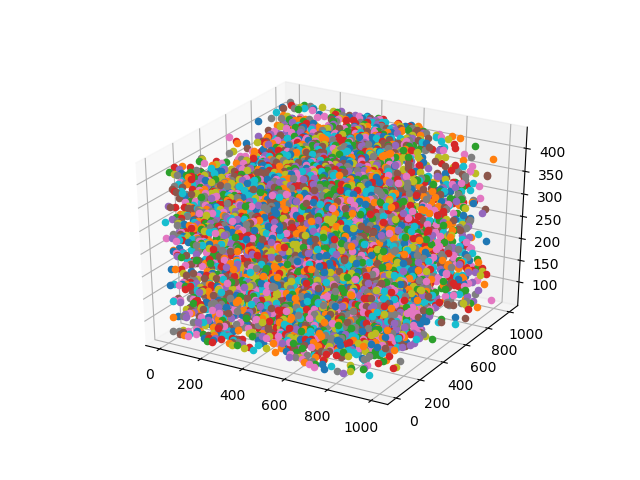

In [2]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for m in med:
    ax.scatter(m[0], m[1], m[2])
plt.show()